In [1]:
!pip install geopandas

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load Shapefiles
world_gdf = gpd.read_file('https://github.com/datasets/geo-countries/raw/master/data/countries.geojson')
us_gdf = gpd.read_file('https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json')

In [4]:
world_gdf.loc[world_gdf['ADMIN'].str.contains('bolivia',case=False)]

,ADMIN,ISO_A3,ISO_A2,geometry
32,Bolivia,BOL,BO,"MULTIPOLYGON (((-65.29247 -11.50472, -65.25756..."


In [5]:
# Global life expectancy
global_life_df = pd.read_csv('https://apps.who.int/gho/athena/data/GHO/WHOSIS_000001,WHOSIS_000015,WHOSIS_000002,WHOSIS_000007?filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=crosstable&format=csv')
global_life_df=global_life_df[['Unnamed: 0',	'Unnamed: 1',	'Life expectancy at birth (years)']]
global_life_df.columns = global_life_df.iloc[0]
global_life_df.drop(global_life_df.index[0], inplace=True)
global_life_df.columns = global_life_df.columns.str.strip()
global_life_df['Year'] = global_life_df['Year'].str.strip()

In [6]:
global_life_df.loc[global_life_df['Country'].str.contains('Russia',case=False),'Country']='Russia'
global_life_df.loc[global_life_df['Country'].str.contains('Venezuela',case=False),'Country']='Venezuela'
global_life_df.loc[global_life_df['Country'].str.contains('Viet Nam',case=False),'Country']='Vietnam'
global_life_df.loc[global_life_df['Country'].str.contains('United Kingdom',case=False),'Country']='United Kingdom'
global_life_df.loc[global_life_df['Country'].str.contains('Bolivia',case=False),'Country']='Bolivia'

In [7]:
# US life expectancy
us_life_df = pd.read_csv('https://data.cdc.gov/api/views/5h56-n989/rows.csv?accessType=DOWNLOAD&bom=true&format=true')

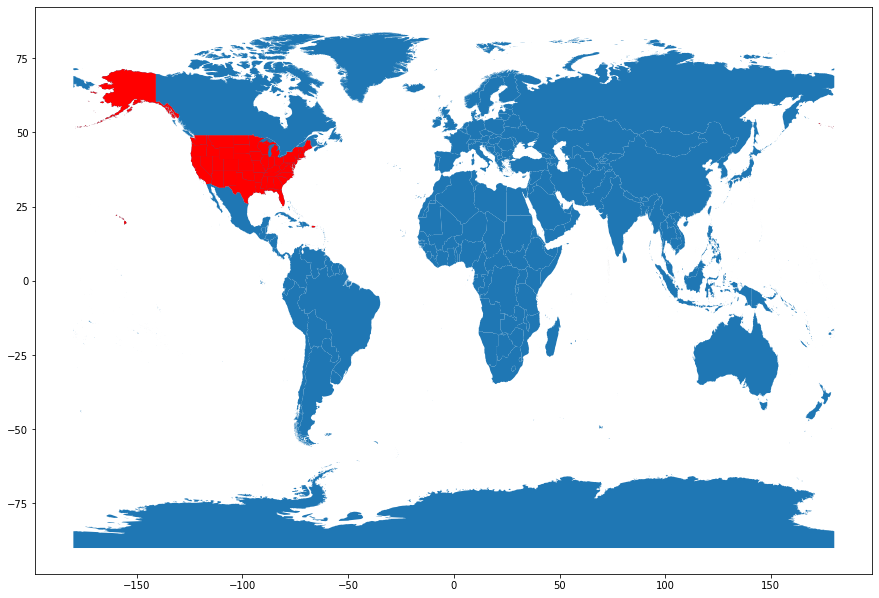

In [8]:
f,ax = plt.subplots(1,1,figsize=(15,15))
world_gdf.plot(ax=ax)
us_gdf.plot(ax=ax, color='red')

In [9]:
# Merge US
us_le_gdf = pd.merge(us_gdf[['NAME', 'geometry']].rename(columns={'NAME':'State'}),
                     us_life_df.loc[us_life_df['County']=='(blank)',
                                    ['State', 'Life Expectancy']
                     ],
                     on='State'
                     )

In [10]:
mississippi_gdf = us_le_gdf.loc[us_le_gdf['State']=='Mississippi']
mississippi_gdf.reset_index(drop=True, inplace=True)

In [11]:
# Merge world
world_le_gdf = pd.merge(world_gdf.rename(columns={'ADMIN':'Country'}),
                        global_life_df.loc[global_life_df['Year']=='2016',
                                           ['Country', 'Both sexes']],
                        on='Country'
                     )
world_le_gdf['Both sexes']=world_le_gdf['Both sexes'].astype('float')

In [12]:
world_le_gdf_less = world_le_gdf.loc[world_le_gdf['Both sexes']<mississippi_gdf.at[0,'Life Expectancy']]
world_le_gdf_greater = world_le_gdf.loc[world_le_gdf['Both sexes']>mississippi_gdf.at[0,'Life Expectancy']]

[]

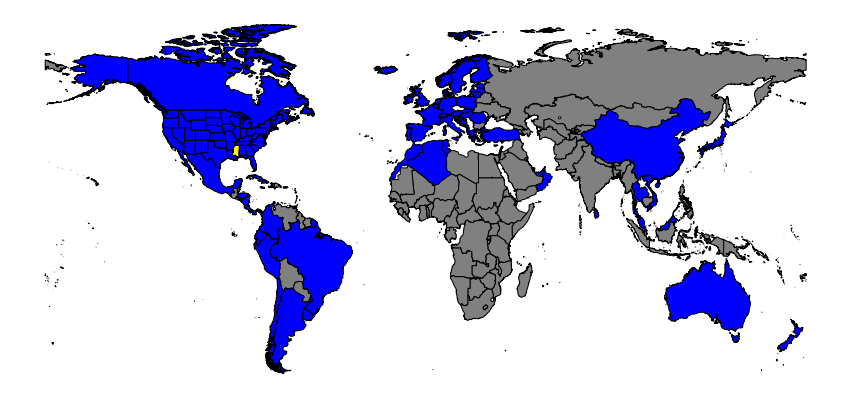

In [13]:
f,ax = plt.subplots(1,1,figsize=(15,15))
world_le_gdf_less.plot(ax=ax, color='grey', edgecolor='black')
world_le_gdf_greater.plot(ax=ax, color='blue', edgecolor='black')
us_gdf.plot(ax=ax, color='blue', edgecolor='black')
mississippi_gdf.plot(ax=ax, color='#fff317', edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])